# **Approche supervisée**

**Algorithme KNN (devoir-TP) Cours A52 - Cegep de Bois-de-Boulogne**
**Par: Ryan NAIDJI**
**Pour: Hafed Benteftifa**

## 1. Collecte de données

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [370]:
data = pd.read_csv("breast.data")

## 2. Pré-Exploration EDA

In [371]:
data.head()

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [372]:
data.shape

(699, 11)

In [373]:
data.info()

# On remarque que la colonne "Bare_Nuclei" est de type object, inspectons-là.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [374]:
uniques_values_data = data.apply(lambda x: pd.unique(x))

print(uniques_values_data)

id_number                      [1000025, 1002945, 1015425, 1016277, 1017023, ...
Clump_Thickness                                  [5, 3, 6, 4, 8, 1, 2, 7, 10, 9]
Uniformity_Cell_Size                             [1, 4, 8, 10, 2, 3, 7, 5, 6, 9]
Uniformity_Cell_Shape                            [1, 4, 8, 10, 2, 3, 5, 6, 7, 9]
Marginal_Adhesion                                [1, 5, 3, 8, 10, 4, 6, 2, 9, 7]
Single_Epithelial_Cell_Size                      [2, 7, 3, 1, 6, 4, 5, 8, 10, 9]
Bare_Nuclei                                   [1, 10, 2, 4, 3, 9, 7, ?, 5, 8, 6]
Bland_Chromatin                                  [3, 9, 1, 2, 4, 5, 7, 8, 6, 10]
Normal_Nucleoli                                  [1, 2, 7, 4, 5, 3, 10, 6, 9, 8]
Mitoses                                             [1, 5, 4, 2, 3, 7, 10, 8, 6]
Class                                                                     [2, 4]
dtype: object


In [375]:
print("Valeurs de classes disponibles:", data["Class"].unique())
print("Occurence des classes disponibles:\n", data["Class"].value_counts())

# Il existe donc deux classes pour la cible, soit 2 ou 4

Valeurs de classes disponibles: [2 4]
Occurence des classes disponibles:
 2    458
4    241
Name: Class, dtype: int64


In [376]:
print(data["Bare_Nuclei"].unique())

# On remarque une valeur "?" dans le descripteur "Bare_Nuclei"

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


## 3. Pré-traitement des données

In [377]:
# On considère la valeur "?" comme une valeur non disponible
data["Bare_Nuclei"] = data["Bare_Nuclei"].replace("?", pd.NA)

In [378]:
# On supprime les enregistrements contenant des valeurs non disponible
data = data.dropna()

In [379]:
# On converti le descripteur "Bare_Nuclei" en numérique
data["Bare_Nuclei"] = pd.to_numeric(data["Bare_Nuclei"])

## 4. Post-Exploration EDA

In [380]:
# Nombre de features dans notre dataframe
nb_features = data.shape[1]
print("Nombre de features:", nb_features)

# Nombre d'enregistrement
nb_enregistrements = data.shape[0]
print("Nombre d'enregistrements:", nb_enregistrements)

# Nombre de valeurs manquantes
nb_total_valeurs_manquantes = data.isnull().sum().sum()
print("Valeurs manquantes:", nb_total_valeurs_manquantes)

# Nombre total de cellules
nb_total_cellules = data.size

# Pourcentage de valeurs manquantes par rapport au nombre total de
# cellules
pourcentage_valeurs_manquantes = (nb_total_valeurs_manquantes / nb_total_cellules) * 100
print("Valeurs manquantes (%):", round(pourcentage_valeurs_manquantes,2))

# Variables qualitatives
features_qualitatives = data.select_dtypes(exclude="number").columns
nb_features_qualitatives = len(features_qualitatives)
print("Features qualitatives:", nb_features_qualitatives)

# Variables quantitatives (numériques)
features_quantitatives = data.select_dtypes(include="number").columns
nb_features_quantitatives = len(features_quantitatives)
print("Features quantitatives:", nb_features_quantitatives)

Nombre de features: 11
Nombre d'enregistrements: 683
Valeurs manquantes: 0
Valeurs manquantes (%): 0.0
Features qualitatives: 0
Features quantitatives: 11


Il n'y a plus de valeurs manquantes dans nos données. De plus, on a que des descripteurs quantitatives.
On peut en conclure que nos données sont correctement nettoyées et prêtent pour l'étape de selection des descripteurs et cible.

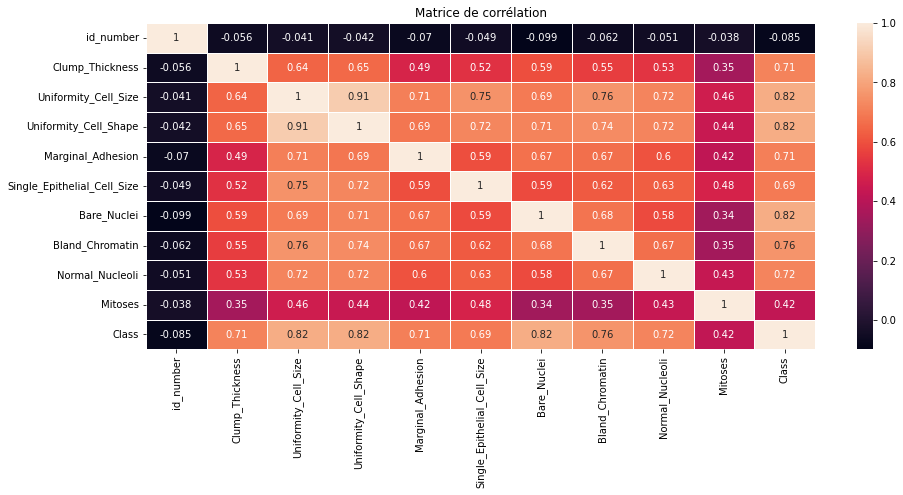

In [381]:
matrice_correlation = data.corr()

plt.figure(figsize=(15,6))
sns.heatmap(matrice_correlation, annot=True, linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [382]:
correlation = data.corr()['Class'].sort_values(ascending = False)
correlation

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.821891
Uniformity_Cell_Size           0.820801
Bland_Chromatin                0.758228
Normal_Nucleoli                0.718677
Clump_Thickness                0.714790
Marginal_Adhesion              0.706294
Single_Epithelial_Cell_Size    0.690958
Mitoses                        0.423448
id_number                     -0.084701
Name: Class, dtype: float64

Interpretation de la matrice de corrélation:
La variable "id_number" a une corrélation très faible avec la variable "Class". Cela signifie que cette variable n'a pas une influence significative sur la cible
Toutes les autres variables (descripteurs) ont des coefficients de corrélation positifs relativement élevés avec la cible. Cela signifie qu'elles sont positivement corrélées avec la cible.

## 5. Feature Engineering

In [383]:
# Prédicteurs: Tout les descripteurs sauf "Class" et "id_number"
X = data.drop(columns=["Class","id_number"])

# Cible: La variable "Class"
y = data["Class"]

In [384]:
X.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [385]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [386]:
# On divise nos données en données d'entrainement et de test. (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)

In [387]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(546, 9) (137, 9) (546,) (137,)


## 6. Développement du modèle

In [388]:
# Selection du modèle k-nearest neighbor
knn = neighbors.KNeighborsClassifier()

# Apprentissage du modèle
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 7. Test et évaluation du modèle

In [389]:
# Prédiction avec le modèle obtenu
y_pred_knn = knn.predict(X_train)
print(y_pred_knn.shape)
# On calcule l'excatitude (accuracy) sur la base des valeurs
# d'entraimenet

accuracy = knn.score(X_train, y_train)
print("Accuracy du modèle prédit:" + str(accuracy))

(546,)
Accuracy du modèle prédit:0.9798534798534798


In [390]:
# On prédit les y_test
y_pred_knn = knn.predict(X_test)
print(y_pred_knn.shape)
# On calcule l'excatitude (accuracy) sur la base des valeurs test
accuracy = knn.score(X_test, y_test)
print("Accuracy du modèle prédit:" + str(accuracy))

(137,)
Accuracy du modèle prédit:0.9781021897810219


Notre modèle a une exactitude de 97.8% pour la phase de test, ce qui est une bonne exactitude.

In [391]:
# On prédit la cible pour un enregistrement Out-Of-Sample
ech = {
    "Clump_Thickness": 4,
    "Uniformity_Cell_Size": 2,
    "Uniformity_Cell_Shape": 1,
    "Marginal_Adhesion": 1,
    "Single_Epithelial_Cell_Size": 1,
    "Bare_Nuclei": 2,
    "Bland_Chromatin": 3,
    "Normal_Nucleoli": 2,
    "Mitoses": 1
}

ech_df = pd.DataFrame(ech, index=[0])

y_pred_knn = knn.predict(ech_df)
print(y_pred_knn.shape)
print(y_pred_knn)

(1,)
[2]


Selon notre modèle, pour cet échantillon on prédit la classe 2.

## 8. Conclusion

L'algorithme kNN a une exactitude de 97.8%